![zad1.png](images/note5/zad1.png)

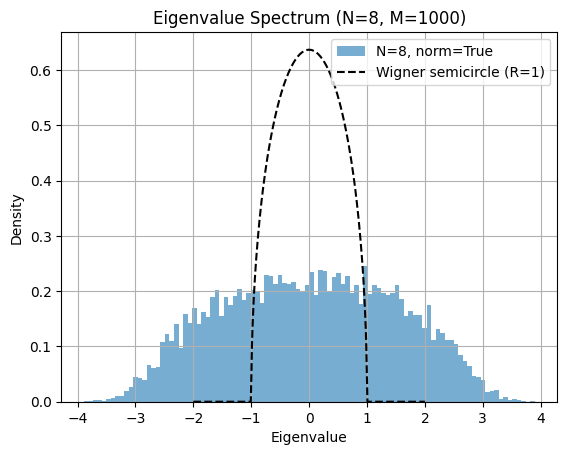

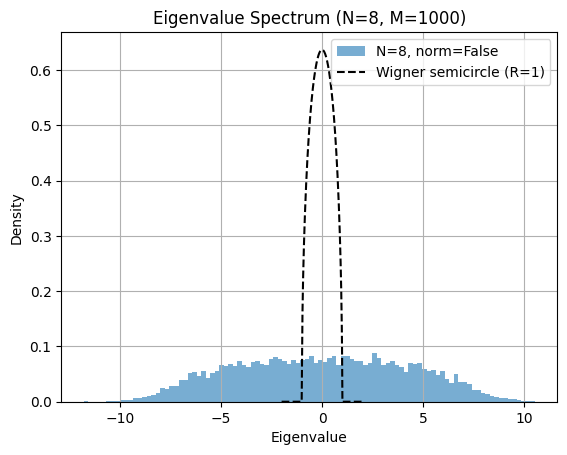

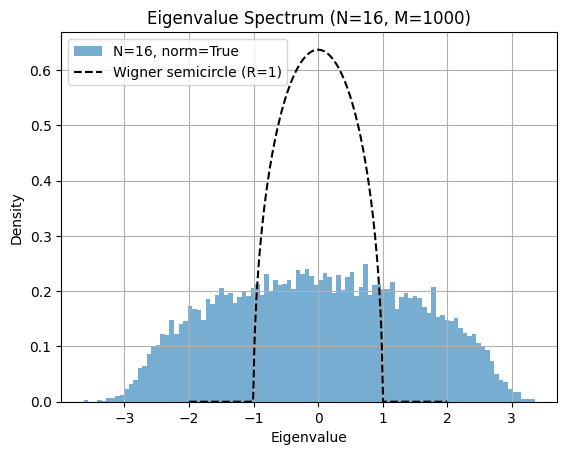

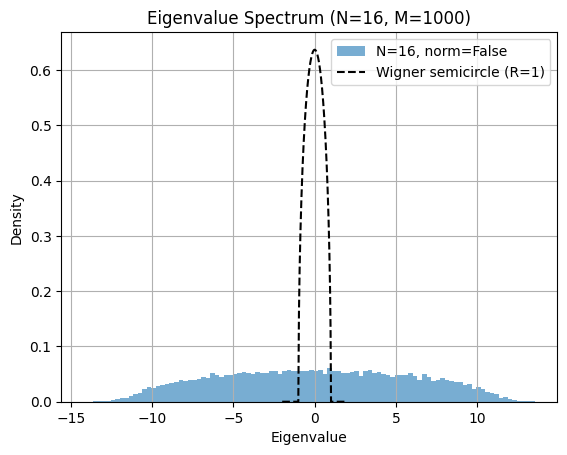

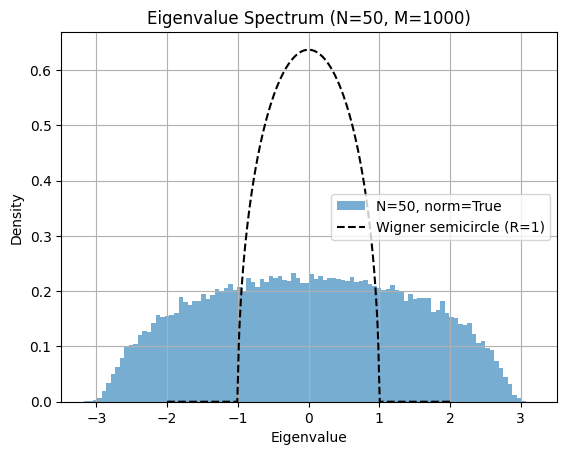

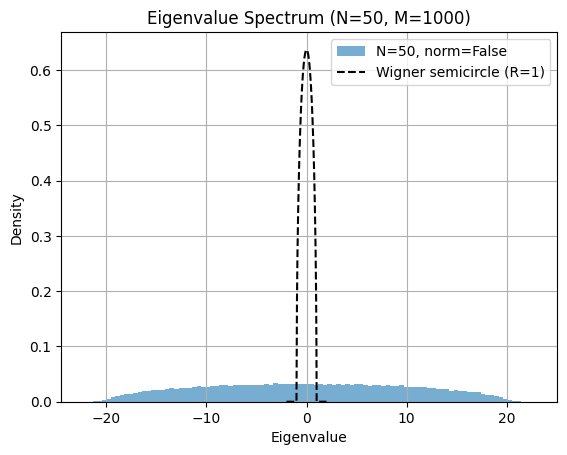

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_goe_matrix(N, sigma=2):
    # generujemy macierz z rozkładu normalnego N(0, sigma^2)
    M = np.random.normal(loc=0, scale=sigma, size=(N, N))
    # tworzymy macierz GOE przez symetryzację i normalizację przez 2√N
    X = (M + M.T) / (2 * np.sqrt(N))
    return X

def wigner_semicircle(x, R=1, N=1):
    # implementujemy rozkład półkola Wignera tworząc maskę dla wartości x w zakresie [-R, R]
    mask = abs(x) <= R
    result = np.zeros_like(x)
    # obliczamy tylko wartości dla punktów spełniających warunek maski
    result[mask] = (2 / (np.pi * R**2)) * np.sqrt(R**2 - x[mask]**2)
    return result

def plot_spectrum(N, M=1000, normalize=True):
    eigenvalues = []

    # generujemy M macierzy i obliczamy ich wartości własne
    for _ in range(M):
        if normalize:
            matrix = generate_goe_matrix(N)  # normalizujemy
        else:
            matrix = generate_goe_matrix(N) * np.sqrt(N)  # nie normalizujemy
        eigenvalues.extend(np.linalg.eigvalsh(matrix))

    plt.hist(eigenvalues, bins=100, density=True, alpha=0.6, label=f"N={N}, norm={normalize}")

    x = np.linspace(-2, 2, 400)
    plt.plot(x, wigner_semicircle(x, R=1), 'k--', label='Wigner semicircle (R=1)')

    plt.title(f"Eigenvalue Spectrum (N={N}, M={M})")
    plt.xlabel("Eigenvalue")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run for different N values
for N in [8, 16, 50]:
    plot_spectrum(N, M=1000, normalize=True)   # With normalization
    plot_spectrum(N, M=1000, normalize=False)  # Without normalization
